Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [51]:
# imports and other such configuration
%matplotlib inline
import nsfg
import thinkstats2
import thinkplot
import numpy as np
from math import sqrt, pow

df = nsfg.ReadFemPreg()
sample = thinkstats2.SampleRows(df, 5000)
weight, age = sample.totalwgt_lb, sample.agepreg

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

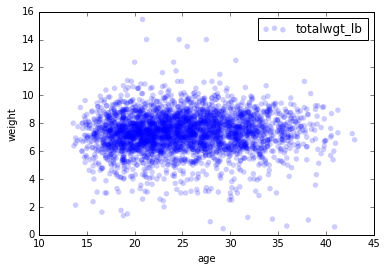

In [52]:
weight_jitter = thinkstats2.Jitter(weight, 0.5)
# don't need jitter for age, no rounding because whole number
thinkplot.Scatter(age, weight)
thinkplot.Show(xlabel = 'age',
               ylabel = 'weight',
               axis = [10, 45, 0, 16])

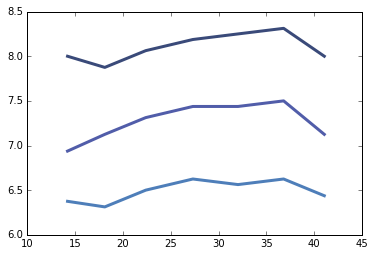

In [53]:
df = df.dropna(subset = ['totalwgt_lb', 'agepreg'])
bins = np.arange(10, 45, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

ages  = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)

In [54]:
print "Pearson correlation,", thinkstats2.Corr(df.totalwgt_lb, df.agepreg)
print "Spearman correlation,", thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

Pearson correlation, 0.0688339703541
Spearman correlation, 0.0946100410966


There is some difference between the two correlations, however the difference is less than 0.1, so the difference is quite small.